In [55]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [56]:
df = pd.read_csv("D:/mnist_test.csv")
X = df.drop('7', axis=1).values 
y = df['7'].values

In [57]:
data = load_digits()
X = data.images.reshape((len(data.images), -1))
y = data.target

In [58]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
pca = PCA(0.90)
X_pca = pca.fit_transform(X)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)




In [61]:
svc_pca = SVC()
svc_pca.fit(X_train, y_train)
svc_original = SVC()
svc_original.fit(X_train, y_train)


SVC()

In [62]:
y_pred_pca = svc_pca.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
y_pred_original = svc_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
print(f"PCA Accuracy: {accuracy_pca}")
print(f"Original Accuracy: {accuracy_original}")
print(f"PCA Confusion Matrix:\n{conf_matrix_pca}")
print(f"Original Confusion Matrix:\n{conf_matrix_original}")

PCA Accuracy: 0.9861111111111112
Original Accuracy: 0.9861111111111112
PCA Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]
Original Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


In [69]:
pca_2d = PCA(n_components=2)
X_test_2d = pca_2d.fit_transform(X_test)

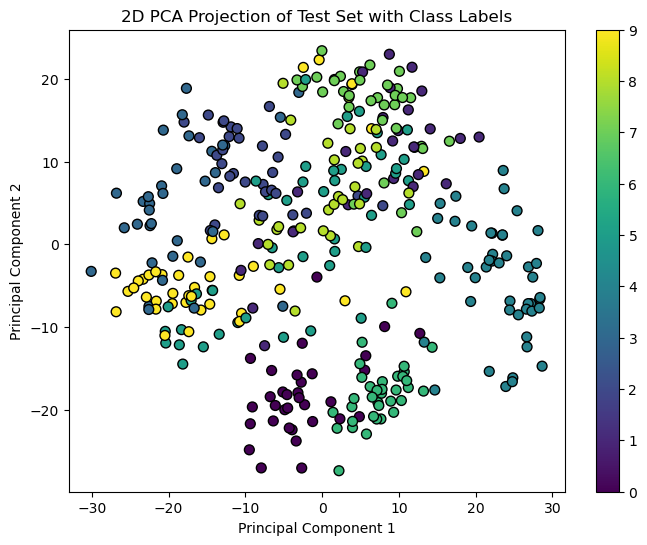

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
plt.colorbar()
plt.title("2D PCA Projection of Test Set with Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()